#Updated 06-02-2021 

<a target="_blank" href="https://colab.research.google.com/github/lopezbec/Traffic_Accident_Detection/blob/master/Anomaly_Detection_Models/iTASK_Intelligent_Traffic_Analysis_Software_Kit_Anomaly_Detection.ipynb"><img src="https://camo.githubusercontent.com/dfbf50eed8dd2dea5f3e0beaaf2001eeca77f314/68747470733a2f2f7777772e74656e736f72666c6f772e6f72672f696d616765732f636f6c61625f6c6f676f5f333270782e706e67" data-canonical-src="https://www.tensorflow.org/images/colab_logo_32px.png">Run in Google Colab</a>

##iTASK - Intelligent Traffic Analysis Software Kit [(Tran, M. T., et al, 2020)](https://openaccess.thecvf.com/content_CVPRW_2020/papers/w35/Tran_iTASK_-_Intelligent_Traffic_Analysis_Software_Kit_CVPRW_2020_paper.pdf)


The Intelligent Traffic Analysis Software Kit (iTASK) of the HCMUS Team  aims to tackle three challenging problems: vehicle flow counting, vehicle re-identification, and abnormal event detection. Experiments on the datasets of traffic flow analysis from AI City Challenge 2020 show their competitive results.

This notebooks implement their forward and backward refine anomaly detection using GAN-based future prediction and backward tracking completely stalled vehicle or sudden-change direction, respectively. 

The method achieved S4 score of 0.9059 for anomaly detection in Track 4.

*   [Original Github repository](https://github.com/selab-hcmus/AI_City_2020)


 




To run this code you just need to follow the instruction and run each of the code cell by clicking on the “run” button.

---



---

#### IMPORTANT INFORMATION: This notebook is intended to work only with the test-data within the AIC20_track4 from [AI City Challenge](https://www.aicitychallenge.org/). A different dataset won't work. In this notebook, take approx. 10min to run. 
---



---

###Download the GitHub repo for testing

In [2]:
!git clone https://github.com/lopezbec/AI_City_2020_iTaskT4.git
%mv AI_City_2020_iTaskT4 AI_City_2020
%cd AI_City_2020/track4-traffic-anomaly-detection


Cloning into 'AI_City_2020_iTaskT4'...
remote: Enumerating objects: 1687, done.
remote: Counting objects: 100% (133/133), done.
remote: Compressing objects: 100% (59/59), done.
remote: Total 1687 (delta 96), reused 83 (delta 67), pack-reused 1554
Receiving objects: 100% (1687/1687), 188.59 MiB | 34.67 MiB/s, done.
Resolving deltas: 100% (726/726), done.
/content/AI_City_2020/track4-traffic-anomaly-detection


## General Setup

Installing all the requirements.



In [3]:
!pip install colour
!sudo apt-get install poppler-utils
!sudo apt autoremove

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 34 not upgraded.
Need to get 154 kB of archives.
After this operation, 613 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 poppler-utils amd64 0.62.0-2ubuntu2.12 [154 kB]
Fetched 154 kB in 1s (284 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend

# iTASK: Abnormal Event Detection

This uses the [AI_City_2020](https://github.com/Mandroide/AI_City_2020)

The following image illustrate the process.

![anomaly_detection](https://raw.githubusercontent.com/selab-hcmus/AI_City_2020/master/track4.png)


## Preprocessing of data

In [4]:

import os
from pathlib import Path

def setup_preprocessed_data():
  %cd preprocessed_data/
  !gdown  --id 1sPRjyGdU1rBI3a75EatsMPx5SWyCT7GM
  !unzip -qq -o Data.zip
  %rm Data.zip
  %cd ..


#@markdown **By default, this comes with a small dataset of videos to detect
#@markdown anomalies**


!sed -n "4 c\dataset_path = r'Datasets/AI city challenge/AIC20_track4/test-data'" "Config.py"
!sed -n "5 c\data_path = os.path.dirname(os.path.abspath(__file__)) + '/preprocessed_data'" "Config.py"
!sed -n "6 c\output_path = data_path + '/output_demo'" "Config.py"

dirs = [x for x in Path('preprocessed_data').iterdir() if x.is_dir()]
if len(dirs)  < 3:
    setup_preprocessed_data()

print("-"*30, "Default configuration", "-"*30, "\n\n")
!cat Config.py

dataset_path = r'Datasets/AI city challenge/AIC20_track4/test-data'
data_path = os.path.dirname(os.path.abspath(__file__)) + '/preprocessed_data'
output_path = data_path + '/output_demo'
/content/AI_City_2020/track4-traffic-anomaly-detection/preprocessed_data
Downloading...
From: https://drive.google.com/uc?id=1sPRjyGdU1rBI3a75EatsMPx5SWyCT7GM
To: /content/AI_City_2020/track4-traffic-anomaly-detection/preprocessed_data/Data.zip
3.92GB [01:07, 58.1MB/s]
/content/AI_City_2020/track4-traffic-anomaly-detection
------------------------------ Default configuration ------------------------------ 


import os.path


dataset_path = 'Datasets/AI city challenge/AIC20_track4/test-data'
data_path = os.path.dirname(os.path.abspath(__file__)) + '/preprocessed_data'
output_path = data_path + '/output_demo'
avg_im_path = data_path + '/average_image'
cuts_dir = data_path + '/cuts'
stop_cuts_dir = data_path + '/stop_cuts'

fps = 30
box_threshold = 0.5
aevent_overlap_ratio = 0.2
aevent_iou = 0.2
threshold

Once everything is completed, the results will be saved within `AI_City_2020/track4-traffic-anomaly-detection/preprocessed_data`

## Run the program

**Running a dataset of 100 videos, takes at least 6 hours**



In [5]:
!python "Test.py"

Parse detector result ...
Processing video  1
[[0, 26760]]
day
{1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.0, 7: 0.0, 8: 0.0, 9: 0.0, 10: 0.0, 11: 0.0, 12: 0.0, 13: 0.0, 14: 0.0, 15: 0.0, 16: 0.0, 17: 0.0, 18: 0.0, 19: 0.0, 20: 0.0, 21: 0.0, 22: 0.0, 23: 0.0, 24: 0.0, 25: 0.0, 26: 0.0, 27: 0.0, 28: 0.0, 29: 0.0, 30: 0.0, 31: 0.0, 32: 0.0, 33: 0.0, 34: 0.0, 35: 0.0, 36: 0.0, 37: 0.0, 38: 0.0, 39: 0.0, 40: 0.0, 41: 0.0, 42: 0.0, 43: 0.0, 44: 0.0, 45: 0.0, 46: 0.0, 47: 0.0, 48: 0.0, 49: 0.0, 50: 0.0, 51: 0.0, 52: 0.0, 53: 0.0, 54: 0.0, 55: 0.0, 56: 0.0, 57: 0.0, 58: 0.0, 59: 0.0, 60: 0.0, 61: 0.0, 62: 0.0, 63: 0.0, 64: 0.0, 65: 0.0, 66: 0.0, 67: 0.0, 68: 0.0, 69: 0.0, 70: 0.0, 71: 0.0, 72: 0.0, 73: 0.0, 74: 0.0, 75: 0.0, 76: 0.0, 77: 0.0, 78: 0.0, 79: 0.0, 80: 0.0, 81: 0.0, 82: 0.0, 83: 0.0, 84: 0.0, 85: 0.0, 86: 0.0, 87: 0.0, 88: 0.0, 89: 0.0, 90: 0.0, 91: 0.0, 92: 0.0, 93: 0.0, 94: 0.0, 95: 0.0, 96: 0.0, 97: 0.0, 98: 0.0, 99: 0.0, 100: 0.0, 101: 0.0, 102: 0.0, 103: 0.0, 104: 0.0, 105:

## Combine the results in a text file

In [6]:
!python "ResultRefinement.py"

The full result content:

*   Images of detected bounding boxes.

*   Images of anomaly events and anomaly proposals.

*   Confident score for each frames in 2 representations: graph and text

*   Detected anomaly events in text: \<video_id> \<scene_id> \<start_time> \<end_time> \<confident_score>

*   A video of the with few frames containing anomaly events.

--------------------------------- Videos with anomalies found --------------------------------- 


--------------------------------------------- 1 ---------------------------------------------


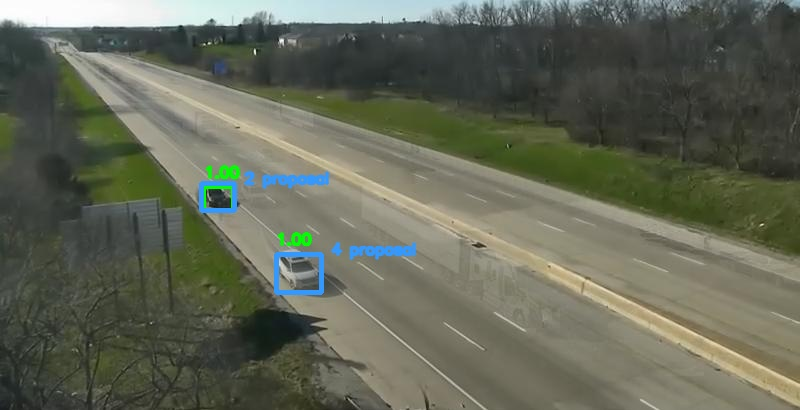

,scene_id,start_time,end_time,confident_score
0,1,75,303,1.0
1,1,67,891,1.0
2,1,101,891,1.0
3,1,376,891,1.0
4,1,557,891,1.0
5,1,696,891,1.0


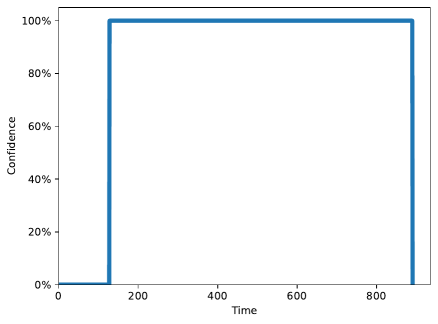

------------------------------------------------------------------------------------------------- 

Summary of videos with anomalies


,video_id,time,confidence
0,1,57.0,1.0


In [7]:
import re
from typing import Union, List
def natural_keys(path: Path) -> List[Union[int, str]]:
    """Sort path names by its cardinal numbers.

    Parameters
    ----------
    path : pathlib.Path
      The element to be sorted.
    """

    def atoi(c: str) -> Union[int, str]:
        """Try to convert a character to an int if possible.

        Parameters
        ----------
        c : str
          The character to check if it's int.
        """
        return int(c) if c.isdigit() else c

    return [atoi(c) for c in re.split('(\d+)', path.stem)]

#@markdown Now you can see the output within
#@markdown `AI_City_2020/track4-traffic-anomaly-detection/preprocessed_data/output_demo`.
#@markdown You can download the results to your computer or visualize the results on this cell.
from google.colab import files
Download_output_demo_zip = False #@param {type:"boolean"}
if Download_output_demo_zip:
  !zip output_demo.zip -r preprocessed_data/output_demo
  files.download('output_demo.zip')

else:
  import cv2
  import matplotlib.pyplot as plt
  import pandas as pd
  from IPython.display import display
  from google.colab.patches import cv2_imshow

  dirs = [x for x in Path('preprocessed_data/output_demo').iterdir() if x.is_dir()]
  dirs.sort(key=natural_keys)
  print("-"*33, "Videos with anomalies found", "-"*33, "\n\n")
  for dir in dirs:  
    dir = dir.resolve()

    print("-"*45, dir.name, "-"*45)
      # Dataframe with scenes found with anomalies
    anomaly_file = str(dir/"anomaly_events.txt")
    df_results = pd.read_csv(anomaly_file, sep=" ",
                             names=["video_id", "scene_id", "start_time",
                                    "end_time", "confident_score"])\
                                    .drop(columns=["video_id"])

    # Choose the first frame from the anomalies found
    frame = f"{df_results.iloc[0, 1]:03d}"
    events_jpg = next(dir.glob("".join(["**/", "events", frame, ".jpg"])))
    event_im = cv2.imread(str(events_jpg))
    cv2_imshow(event_im)
    cv2.waitKey(1) & 0xff
      
    display(df_results)

    # Display the figure within the PDF of anomalies
    anomaly_pdf = str(dir/(dir.name + "_anomaly.pdf"))
    anomaly_png = dir/(dir.name + "_anomaly.png")
    !pdftoppm -png {anomaly_pdf} {anomaly_png}
    anomaly_png = list(dir.glob("*.png"))[0]
    img = cv2.imread(str(anomaly_png))
    scale_percent = 50 # percent of original size
    width = int(img.shape[1] * scale_percent / 100)
    height = int(img.shape[0] * scale_percent / 100)
    dim = (width, height)
    img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
    cv2_imshow(img)
    cv2.destroyAllWindows()
    !rm {anomaly_png}

  print("-"*97, "\n")
  print("Summary of videos with anomalies")
  df_result_all = pd.read_csv(dirs[0].parent/"result_all.txt", sep=" ",
                               names=["video_id", "time", "confidence"])
  
  display(df_result_all)

